In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read dataset
#dfappdata = pd.read_csv(r"C:\python_data\application_data.csv")
#dfprevdata = pd.read_csv(r"C:\python_data\previous_application.csv")
dfappdata = pd.read_csv(r"E:\DataScience\PGDM\Credit_EDA_CaseStudy\application_data.csv")
dfprevdata = pd.read_csv(r"E:\DataScience\PGDM\Credit_EDA_CaseStudy\previous_application.csv")


pd.set_option('display.max_columns', 200) # to display all the columns
#pd.set_option('display.max_rows',500) # to display only 500 rows-----got different results by adding this, so dont use this

print(dfappdata.shape)
print(dfprevdata.shape)

(307511, 122)
(1670214, 37)


There are 3,07,511 rows and 122 columns in the appication_data file.
There are 16,70,214 rows and 37 columns in the previous_appication file.

In [2]:
dfappdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
dfprevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Let's check the Target variable count
dfappdata['TARGET'].value_counts()

0    252766
1     23125
Name: TARGET, dtype: int64

In [104]:
# Ratio of data imbalance
zeros = round(252766*100/(252766+23125),2)
ones = round(23125*100/(252766+23125),2)
print('The ratio of 0\'s are',zeros,'%' 'and 1\'s are',ones,'% from the actual dataset' )

The ratio of 0's are 91.62 %and 1's are 8.38 % from the actual dataset


In [4]:
# Finding number of null values percentage from the dataset
null_val = dfappdata.isnull().sum()
null_val1 = null_val[null_val.values >(0.2*len(dfappdata))]
print('No. of columns having more than 20% null values-',null_val1.shape)
null_val2 = null_val[null_val.values >(0.3*len(dfappdata))]
print('No. of columns having more than 30% null values-',null_val2.shape)
null_val3 = null_val[null_val.values >(0.4*len(dfappdata))]
print('No. of columns having more than 40% null values-',null_val3.shape)
null_val4 = null_val[null_val.values >(0.5*len(dfappdata))]
print('No. of columns having more than 50% null values-',null_val4.shape)

No. of columns having more than 20% null values- (50,)
No. of columns having more than 30% null values- (50,)
No. of columns having more than 40% null values- (49,)
No. of columns having more than 50% null values- (41,)


Looking at these numbers its safe to drop columns having more than 30% null values

In [5]:
rows=len(dfappdata)
columns = null_val/rows
columns = list(columns[columns.values>=0.3].index)
dfappdata.drop(labels = columns,axis =1,inplace=True)        
print(dfappdata.shape)
#dfappdata.head()

(307511, 72)


In [6]:
# Identifying different types of datatypes in the dataframe
dfappdata.dtypes.value_counts()

int64      41
float64    20
object     11
dtype: int64

So there are 3 types of data types available from our dataset. So we can fill missing values of 'Object' datatype columns with 'mode' and int64,float64 with 'median'. As mean is depends on outliers we are using median to fill the numerical values.

In [7]:
### To analyze data in columns where in there is less percentage and we can check ways to impute values
null_val = dfappdata.isnull().sum()#number of null values in each column
rows=len(dfappdata)
columns = null_val/rows
columns = list(columns[columns.values>=0.15].index)
print(dfappdata[columns])

        EXT_SOURCE_3
0           0.139376
1                NaN
2           0.729567
3                NaN
4                NaN
5           0.621226
6           0.492060
7           0.540654
8           0.751724
9                NaN
10          0.363945
11          0.652897
12          0.176653
13          0.770087
14               NaN
15          0.678568
16          0.062103
17               NaN
18          0.556727
19          0.477649
20               NaN
21          0.542445
22          0.358951
23          0.669057
24          0.565608
25          0.461482
26          0.190706
27          0.659406
28          0.524496
29               NaN
...              ...
307481      0.511892
307482      0.394495
307483      0.520898
307484           NaN
307485      0.865896
307486      0.199771
307487      0.255332
307488      0.529890
307489      0.397946
307490      0.495666
307491      0.716570
307492      0.365617
307493      0.728141
307494      0.511892
307495      0.597192
307496      0

In [8]:
# since the data is widespread, let's impute the missing values with median
dfappdata['EXT_SOURCE_3'].fillna(dfappdata['EXT_SOURCE_3'].median(), inplace=True)
# same can be done on source 2 as well
dfappdata['EXT_SOURCE_2'].fillna(dfappdata['EXT_SOURCE_2'].median(), inplace=True)

In [9]:
### To analyze data in columns where in there is less percentage and we can check ways to impute values
null_val = dfappdata.isnull().sum()#number of null values in each column
rows=len(dfappdata)
columns = null_val/rows
columns = list(columns[columns.values>=0.13].index)
print(dfappdata[columns])

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              0.0                        0.0   
5                              0.0                        0.0   
6                              0.0                        0.0   
7                              0.0                        0.0   
8                              0.0                        0.0   
9                              NaN                        NaN   
10                             0.0                        0.0   
11                             0.0                        0.0   
12                             0.0                        0.0   
13                             0.0                        0.0   
14                       

In [10]:
## it's better to drop all these as these have mainly Nan values or 0
dfappdata.drop(labels = columns,axis =1,inplace=True)        
print(dfappdata.shape)

(307511, 66)


In [11]:
### let's check rest of the columns having null values
null_val = dfappdata.isnull().sum()#number of null values in each column
rows=len(dfappdata)
columns = null_val/rows
columns = list(columns[columns.values<0.13].index)
print(dfappdata[columns])

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cas

In [12]:
# since SK_ID_CURR need to be unique, let's drop rows having null values
dfappdata = dfappdata[~np.isnan(dfappdata['SK_ID_CURR'])]
# since it wont make sense to fill null values with mean or median, let's drop rows having null values
dfappdata = dfappdata[~np.isnan(dfappdata['AMT_ANNUITY'])]
## in order to do accurate analysis, let's drop the null values from OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, 
## since only 1 row has null value in DAYS_LAST_PHONE_CHANGE and only 2 in CNT_FAM_MEMBERS, let's drop these
dfappdata = dfappdata[~np.isnan(dfappdata['OBS_30_CNT_SOCIAL_CIRCLE'])]
dfappdata = dfappdata[~np.isnan(dfappdata['DEF_30_CNT_SOCIAL_CIRCLE'])]
dfappdata = dfappdata[~np.isnan(dfappdata['OBS_60_CNT_SOCIAL_CIRCLE'])]
dfappdata = dfappdata[~np.isnan(dfappdata['DEF_60_CNT_SOCIAL_CIRCLE'])]
dfappdata = dfappdata[~np.isnan(dfappdata['DAYS_LAST_PHONE_CHANGE'])]
dfappdata = dfappdata[~np.isnan(dfappdata['CNT_FAM_MEMBERS'])]
## let's take a mean value to fill na in AMT_GOODS_PRICE
dfappdata['AMT_GOODS_PRICE'].fillna(dfappdata['AMT_GOODS_PRICE'].mean(), inplace=True)

In [13]:
## lets look at its values
dfappdata.NAME_TYPE_SUITE.value_counts()

Unaccompanied      247625
Family              40057
Spouse, partner     11343
Children             3261
Other_B              1765
Other_A               865
Group of people       269
Name: NAME_TYPE_SUITE, dtype: int64

In [14]:
## looking at above data, it's safe to fill na values with 'Unaccompanied' 
dfappdata['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

In [15]:
print(dfappdata.isnull().sum())

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
          

Now, data is all cleaned up and there are no more null values

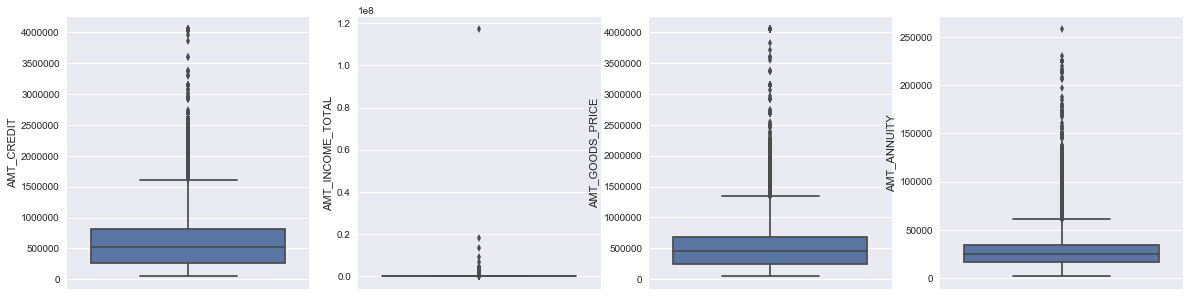

In [16]:
## Checking outliers from the data
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=4,figsize=(20,5))
sns.boxplot(data =dfappdata,x='AMT_CREDIT',ax=ax[0],orient='v')
sns.boxplot(data =dfappdata,x='AMT_INCOME_TOTAL',ax=ax[1],orient='v')
sns.boxplot(data =dfappdata,x='AMT_GOODS_PRICE',ax=ax[2],orient='v')
sns.boxplot(data =dfappdata,x='AMT_ANNUITY',ax=ax[3],orient='v')

These boxplots clearly show that there are outliers and we can remove those. To remove these rows with outliers, we need to find out upper whiskers' value for each of these.

In [17]:
## function to first get the value of upper whisker of a column and then returning rows having value less than upper whisker
def deloutlier(col,dfappdata):
    upper_quartile = np.percentile(dfappdata[col], 75)
    lower_quartile = np.percentile(dfappdata[col], 25)
    iqr = upper_quartile - lower_quartile
    upper_whisker = dfappdata[col][dfappdata[col]<=upper_quartile+1.5*iqr].max()
    return(dfappdata[dfappdata[col] <= upper_whisker])  

In [18]:
# Call function to delete outliers
dfappdata = deloutlier('AMT_CREDIT',dfappdata)
dfappdata = deloutlier('AMT_INCOME_TOTAL',dfappdata)
dfappdata = deloutlier('AMT_GOODS_PRICE',dfappdata)
dfappdata = deloutlier('AMT_ANNUITY',dfappdata)

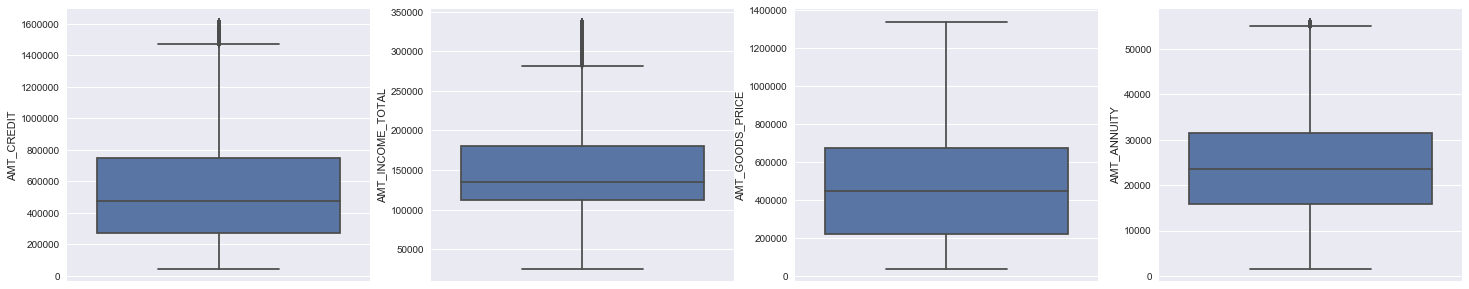

In [19]:
# let's boxplot to see how does it look after removing the outliers
fig, ax=plt.subplots(nrows =1,ncols=4,figsize=(25,5))
sns.boxplot(data =dfappdata,x='AMT_CREDIT',ax=ax[0],orient='v')
sns.boxplot(data =dfappdata,x='AMT_INCOME_TOTAL',ax=ax[1],orient='v')
sns.boxplot(data =dfappdata,x='AMT_GOODS_PRICE',ax=ax[2],orient='v')
sns.boxplot(data =dfappdata,x='AMT_ANNUITY',ax=ax[3],orient='v')

In [20]:
# Calculating the age of the customer from days
abs(dfappdata['DAYS_BIRTH']/365).describe()

count    275891.000000
mean         43.929838
std          12.117054
min          20.517808
25%          33.767123
50%          43.101370
75%          54.109589
max          69.043836
Name: DAYS_BIRTH, dtype: float64

Now 'DAYS_BIRTH' column has minimum age of 20.5 years and maximum age of 69.12 years which looks resonable, so there are no outliers in DAYS_BIRTH columns

In [21]:
# Calculating years from days_employed
abs(dfappdata['DAYS_EMPLOYED']/365).describe()

count    275891.000000
mean        192.814199
std         388.069299
min           0.000000
25%           2.520548
50%           6.032877
75%          16.336986
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

From the DAYS_EMPLOYED column we could see that min value is 0 and maximum is 1000. As it is impossible to person work for 1000 years. So we replace those records which are coming under outliers as null values.

In [22]:
# Replacing the outlier values with nan
dfappdata['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [23]:
# Now outliers are removed from DAYS_EMPLOYED column
dfappdata['DAYS_EMPLOYED'].describe()

count    224173.000000
mean      -2349.943187
std        2329.451530
min      -17912.000000
25%       -3124.000000
50%       -1611.000000
75%        -749.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [24]:
# There are many columns which are not making sense to analyze, we can drop these so that the focus goes on important ones
dfappdata = dfappdata.drop(columns = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis =1)

In [25]:
dfappdata.shape

(275891, 33)

33 columns are good to analyze

In [26]:
# Checking the Target variable values
dfappdata['TARGET'].value_counts()

0    252766
1     23125
Name: TARGET, dtype: int64

There are 13,06,815 - 0's and 1,23,340 - 1's are there. So the TARGET variable is Im-Balanced.

In [27]:
# Ratio of data imbalanced after cleaning the given data
(123340)*100/1306815

9.438214284347822

Since data imbalance is significant, we should analyze the data separately for target '0' and target '1'. we can start with Univariate analysis and then bivariate analysis

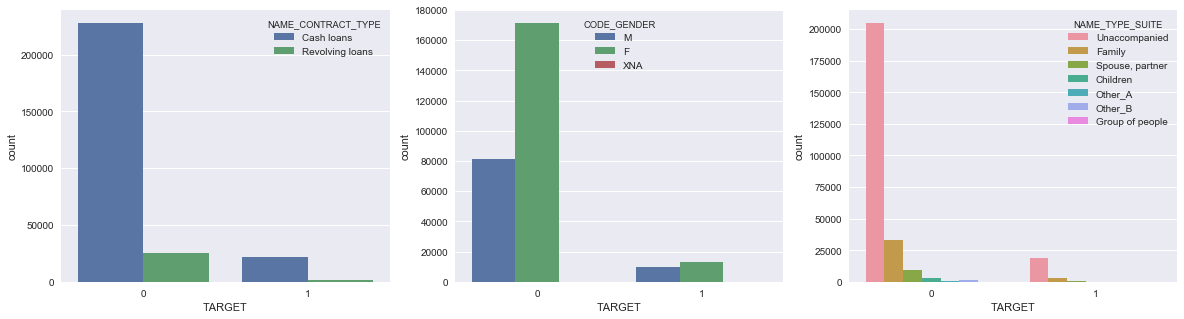

In [28]:
import warnings
warnings.filterwarnings("ignore")
fig, ax =plt.subplots(1,3,figsize=(20,5))
sns.countplot(x = "TARGET", hue ='NAME_CONTRACT_TYPE', ax=ax[0], data=dfappdata)
sns.countplot(x = "TARGET", hue ='CODE_GENDER', ax=ax[1], data=dfappdata)
sns.countplot(x = "TARGET", hue ='NAME_TYPE_SUITE', ax=ax[2], data=dfappdata)
fig.show()

Insights--
1. NAME_CONTRACT_TYPE --> More focus need to be taken on cash loans as there is no default on Revolving loans
2. CODE_GENDER---> Count of female is more in both cases, hence this is not of much significance
3. NAME_TYPE_SUITE---> Same case for this, data is relative. If client wasn't accompanied with anyone, numbers are high both sides, hence this is not of much significance as well

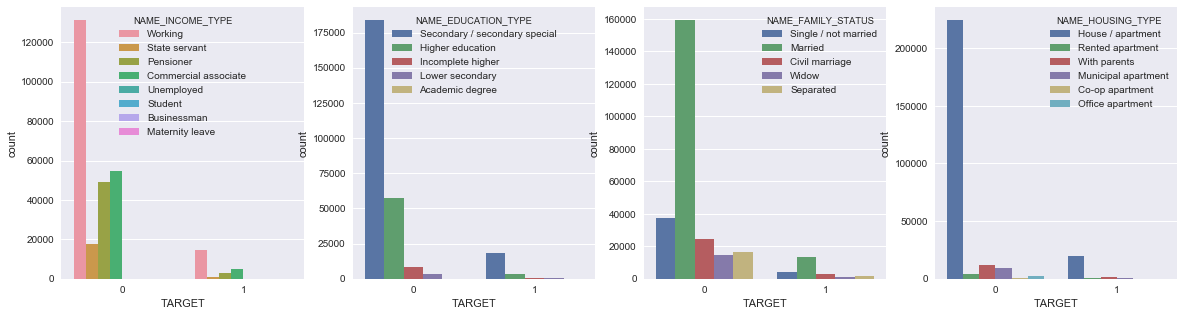

In [29]:
fig, ax =plt.subplots(1,4,figsize=(20,5))
sns.countplot(x = "TARGET", hue ='NAME_INCOME_TYPE', ax=ax[0], data=dfappdata)
sns.countplot(x = "TARGET", hue ='NAME_EDUCATION_TYPE', ax=ax[1], data=dfappdata)
sns.countplot(x = "TARGET", hue ='NAME_FAMILY_STATUS', ax=ax[2], data=dfappdata)
sns.countplot(x = "TARGET", hue ='NAME_HOUSING_TYPE', ax=ax[3], data=dfappdata)
fig.show()

Insights--

1. NAME_INCOME_TYPE --> Income type data looks similar in both default and no default cases. So, this is not important
2. NAME_EDUCATION_TYPE---> Clients with Secondary and higher education have defaulted compared to other education levels, hence its important to focus on this
3. NAME_FAMILY_STATUS---> Data shows that overall married people have take more loans but rest of the data looks similar in both default and no default cases
4. NAME_HOUSING_TYPE --> Though more overall loan is taken by those clients having House/apartment but other categories haven't defaulted. So, this is important to consider

In [30]:
#temp=dfappdata.groupby('TARGET')['ORGANIZATION_TYPE'].value_counts()
#temp

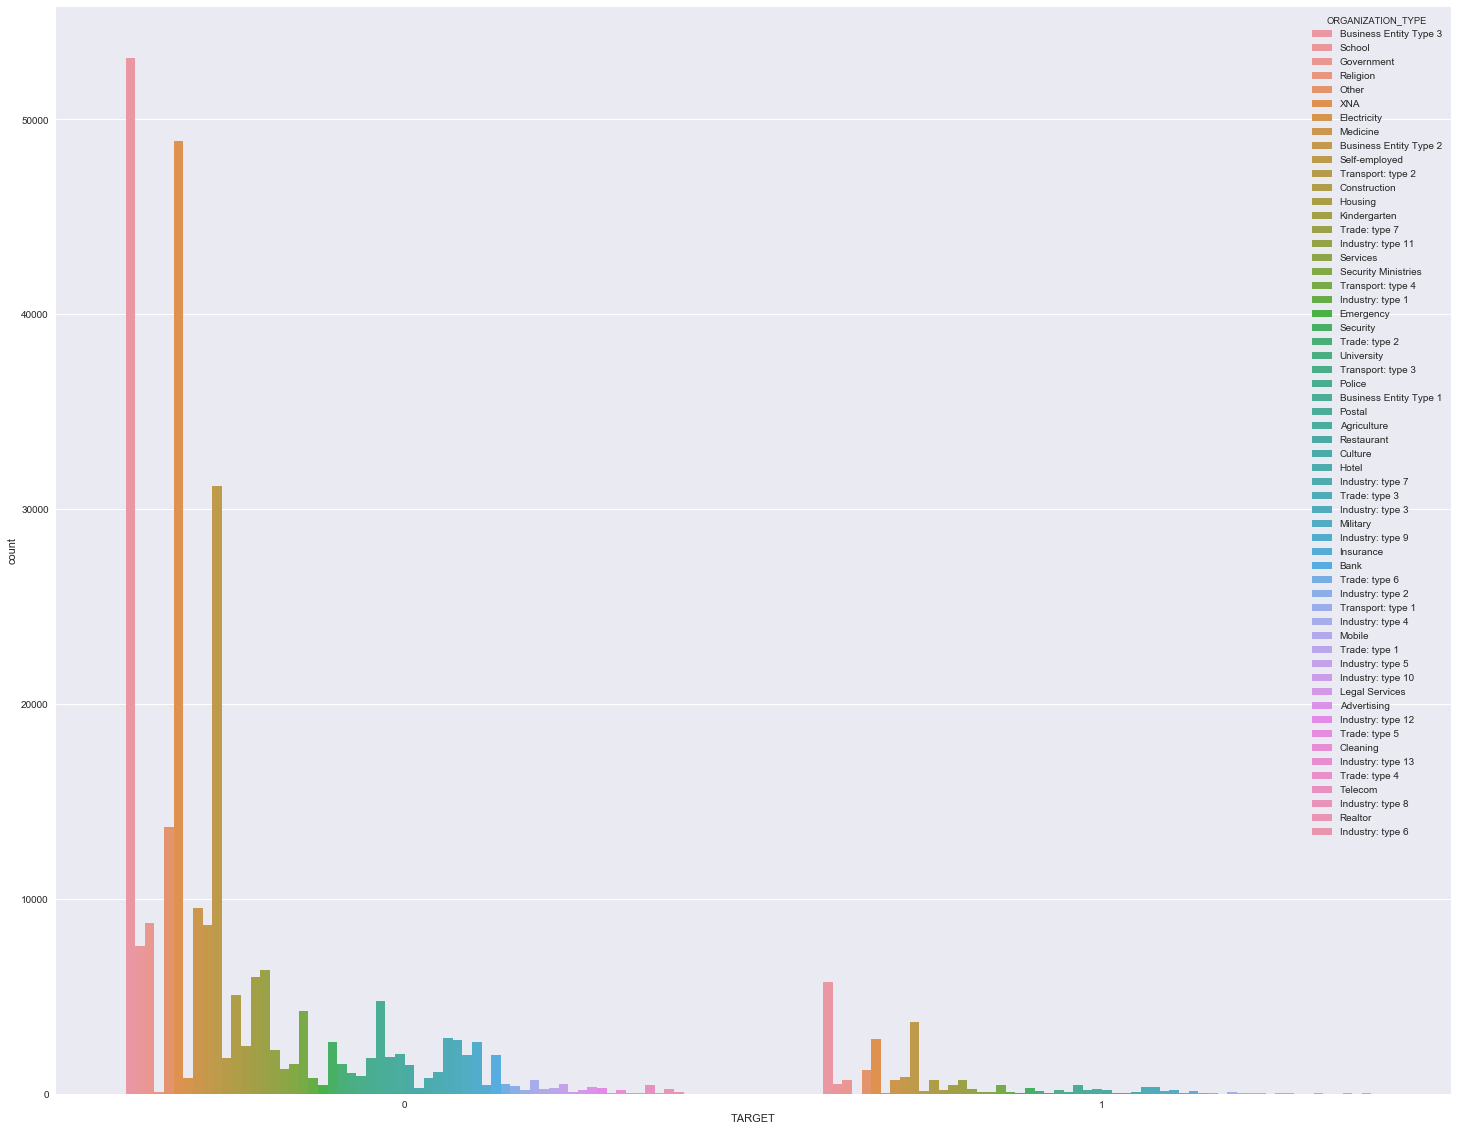

In [31]:
fig, ax =plt.subplots(1,1,figsize=(25,20))
sns.countplot(x = "TARGET", hue ='ORGANIZATION_TYPE', data=dfappdata)
fig.show()

Insights--
1. ORGANIZATION_TYPE---> Overall pattern looks similar in both cases, but after closely observing the top 3 types under no default cases are - Business Entity Type 3, XNA, Self-employed and top 3 under default cases are Police, Industry: type 7,Services. Since its not the same pattern in both cases, its important to look at this category while giving loan

In [69]:
## since lot of analysis is completed on application data, it can now be merged with previous data file to do rest of the analysis

# Extracting 'Name_contract_status' from previous data file and appending it to the application_data file
df3 = dfprevdata[['SK_ID_CURR','NAME_CONTRACT_STATUS']]
dfinal = pd.merge(dfappdata,df3,on='SK_ID_CURR',how ='left')

In [70]:
# segment the data by target value for analyzing continous variables
df1=dfinal.loc[dfinal['TARGET']==1]
df0=dfinal.loc[dfinal['TARGET']==0]

In [71]:
## TARGET can be removed as the dataframes are based on that value only. Removing SK_ID_CURR as its just unique random number
df1=df1.drop(['SK_ID_CURR','TARGET'],axis=1)
df0=df0.drop(['SK_ID_CURR','TARGET'],axis=1)

In [72]:
#Find correlations with the target and sort
#correlations1 = dfinal.corr()
#correlations1
#export_excel1 = dfinal.to_excel (r'C:\python_data\export_dataframe1.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path
#export_excel = correlations1.to_excel (r'C:\python_data\export_dataframe.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path

In [73]:
#Find correlations with the target and sort
correlations = df1.corr()
correlations

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
CNT_CHILDREN,1.000000,-0.011375,-0.001983,0.041453,-0.009143,-0.021543,0.293078,0.044156,0.153005,-0.013308,0.885546,0.035841,0.037135,-0.022427,-0.031294,0.022988,0.009752,0.021910,0.002655,0.018086
AMT_INCOME_TOTAL,-0.011375,1.000000,0.268328,0.347606,0.265445,0.077862,-0.006638,-0.027956,0.027911,-0.000456,-0.007791,-0.146796,-0.158313,0.119483,-0.087782,-0.000586,-0.007438,-0.000520,-0.008199,-0.067461
AMT_CREDIT,-0.001983,0.268328,1.000000,0.741773,0.977430,0.055489,-0.115070,-0.108529,-0.029063,-0.024936,0.052731,-0.040804,-0.045513,0.077970,0.060031,0.009587,-0.022511,0.009853,-0.027232,-0.099207
AMT_ANNUITY,0.041453,0.347606,0.741773,1.000000,0.738289,0.046206,0.018962,-0.047784,0.047784,0.014543,0.087883,-0.043257,-0.054521,0.068028,0.020340,0.002004,-0.013566,0.003559,-0.016540,-0.054751
AMT_GOODS_PRICE,-0.009143,0.265445,0.977430,0.738289,1.000000,0.063840,-0.117891,-0.119049,-0.030952,-0.028878,0.048778,-0.048766,-0.052207,0.087851,0.061824,0.012475,-0.017355,0.012825,-0.022550,-0.107703
REGION_POPULATION_RELATIVE,-0.021543,0.077862,0.055489,0.046206,0.063840,1.000000,-0.051269,-0.019937,-0.041690,-0.014068,-0.021472,-0.403075,-0.406758,0.162309,-0.005127,0.009126,0.022127,0.009399,0.016762,-0.041562
DAYS_BIRTH,0.293078,-0.006638,-0.115070,0.018962,-0.117891,-0.051269,1.000000,0.295034,0.281473,0.242056,0.249906,0.046161,0.044282,-0.111032,-0.128725,0.000452,0.000361,-0.000260,0.004667,0.129620
DAYS_EMPLOYED,0.044156,-0.027956,-0.108529,-0.047784,-0.119049,-0.019937,0.295034,1.000000,0.143787,0.086051,0.012280,0.007594,0.004016,-0.096954,-0.044400,-0.031360,-0.001585,-0.031504,-0.002802,0.164087
DAYS_REGISTRATION,0.153005,0.027911,-0.029063,0.047784,-0.030952,-0.041690,0.281473,0.143787,1.000000,0.098817,0.154790,0.092096,0.087614,-0.066171,-0.064577,0.009974,0.008962,0.010763,0.014431,0.065856
DAYS_ID_PUBLISH,-0.013308,-0.000456,-0.024936,0.014543,-0.028878,-0.014068,0.242056,0.086051,0.098817,1.000000,-0.004524,0.006012,0.004381,-0.048475,-0.074268,-0.016057,-0.003649,-0.015893,-0.004500,0.117976


Looking at above, we can drop CNT_CHILDREN, REGION_RATING_CLIENT, AMT_INCOME_TOTAL, REGION_POPULATION_RELATIVE, CNT_FAM_MEMBERS, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, EXT_SOURCE_2, EXT_SOURCE_3, DAYS_LAST_PHONE_CHANGE
from this analysis as there is hardly any strong corelation with any other column

In [74]:
df1=df1.drop(['CNT_CHILDREN','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE'],axis=1)
correlations = df1.corr()

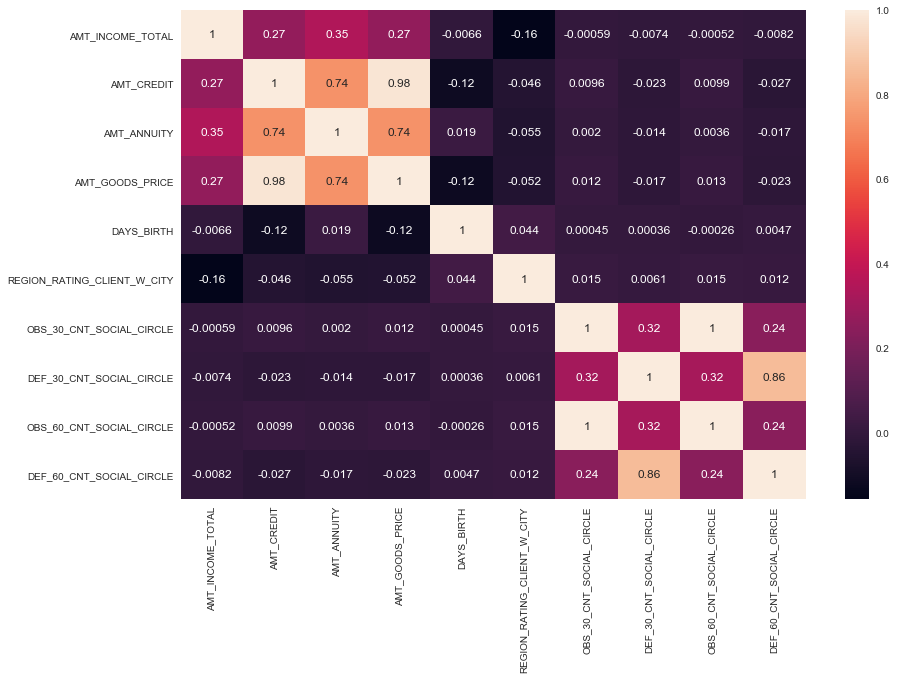

In [75]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(correlations,xticklabels=correlations.columns.values,yticklabels=correlations.columns.values,annot= True)
plt.show()

This is the heat map of cases with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample.
Strong corelation between the following -
    1. 'AMT_GOODS_PRICE' and 'AMT_ANNUITY'
    2. 'AMT_ANNUITY' and 'AMT_CREDIT'
    3. 'AMT_GOODS_PRICE' and 'AMT_CREDIT'
    4. 'DEF_30_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE'

In [76]:
correlations = df0.corr()
correlations

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
CNT_CHILDREN,1.000000,0.017361,0.006365,0.030278,0.002546,-0.022775,0.369670,0.071848,0.193288,-0.009630,0.876135,0.026761,0.025173,-0.022655,-0.043465,0.020108,-0.001134,0.019610,-0.001553,0.005459
AMT_INCOME_TOTAL,0.017361,1.000000,0.312097,0.390906,0.312967,0.121124,0.082468,-0.029107,0.060483,0.037841,0.018359,-0.171273,-0.188397,0.130061,-0.101530,-0.009974,-0.019405,-0.009905,-0.018897,-0.051217
AMT_CREDIT,0.006365,0.312097,1.000000,0.758148,0.981571,0.044720,-0.030569,-0.075445,0.006022,0.015880,0.061753,-0.045939,-0.051843,0.083756,0.012765,0.010049,-0.007839,0.010032,-0.010601,-0.069093
AMT_ANNUITY,0.030278,0.390906,0.758148,1.000000,0.757449,0.061928,0.047411,-0.030950,0.043078,0.038152,0.084620,-0.073509,-0.085381,0.077592,-0.005451,0.000415,-0.008668,0.000788,-0.010306,-0.050640
AMT_GOODS_PRICE,0.002546,0.312967,0.981571,0.757449,1.000000,0.049576,-0.027623,-0.076606,0.009193,0.013778,0.060567,-0.047532,-0.052280,0.090967,0.014400,0.012195,-0.007652,0.012119,-0.010175,-0.073535
REGION_POPULATION_RELATIVE,-0.022775,0.121124,0.044720,0.061928,0.049576,1.000000,-0.035696,-0.001165,-0.050166,-0.007664,-0.022122,-0.486358,-0.486656,0.170761,-0.006299,0.003626,0.015425,0.004114,0.012614,-0.042442
DAYS_BIRTH,0.369670,0.082468,-0.030569,0.047411,-0.027623,-0.035696,1.000000,0.334963,0.333113,0.275669,0.334088,0.015286,0.013314,-0.077714,-0.164803,0.016851,-0.001793,0.016359,0.000461,0.082084
DAYS_EMPLOYED,0.071848,-0.029107,-0.075445,-0.030950,-0.076606,-0.001165,0.334963,1.000000,0.170010,0.076795,0.047511,-0.010093,-0.009908,-0.075663,-0.094213,-0.002036,0.003207,-0.002105,0.008183,0.134674
DAYS_REGISTRATION,0.193288,0.060483,0.006022,0.043078,0.009193,-0.050166,0.333113,0.170010,1.000000,0.103960,0.187102,0.082398,0.075612,-0.057328,-0.094978,0.014645,0.006076,0.014566,0.005142,0.054809
DAYS_ID_PUBLISH,-0.009630,0.037841,0.015880,0.038152,0.013778,-0.007664,0.275669,0.076795,0.103960,1.000000,0.006411,-0.002999,-0.004495,-0.036154,-0.101338,-0.012107,-0.000042,-0.012449,0.001871,0.079991


Looking at above, we can drop CNT_CHILDREN, REGION_POPULATION_RELATIVE, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, EXT_SOURCE_2, EXT_SOURCE_3, DAYS_LAST_PHONE_CHANGE from this analysis as there is hardly any strong corelation with any other column

In [77]:
df0=df0.drop(['CNT_CHILDREN','REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT','EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE'],axis=1)
correlations = df0.corr()

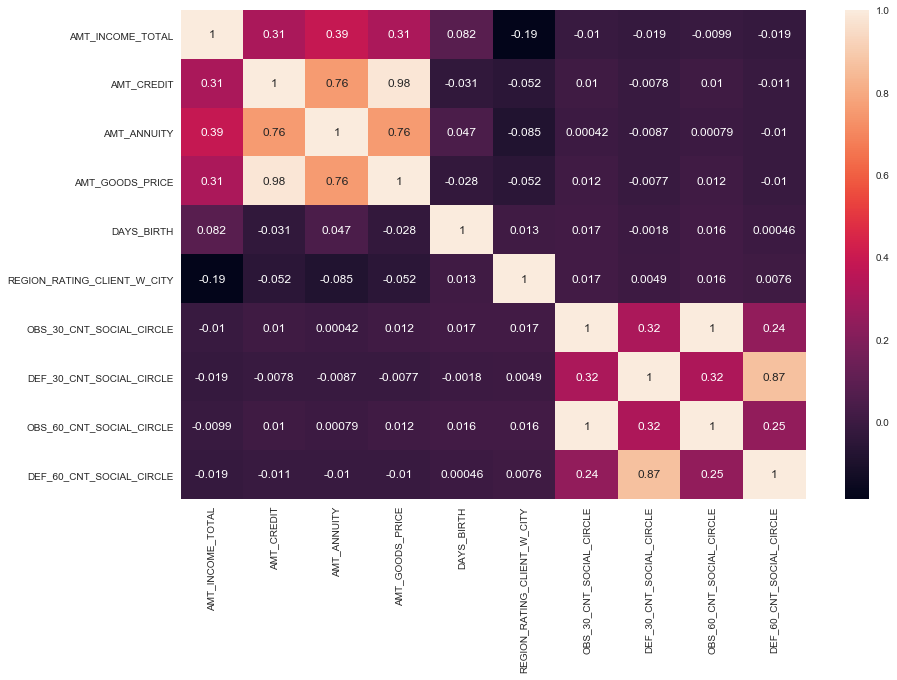

In [78]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(correlations,xticklabels=correlations.columns.values,yticklabels=correlations.columns.values,annot= True)
plt.show()

This is the heat map of cases with no payment difficulties. 
Strong corelation between the following -
    1. 'AMT_GOODS_PRICE' and 'AMT_ANNUITY'
    2. 'AMT_ANNUITY' and 'AMT_CREDIT'
    3. 'AMT_GOODS_PRICE' and 'AMT_CREDIT'
    4. 'DEF_30_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE'


It's okay to take only 'AMT_CREDIT' for analysis as all others are related

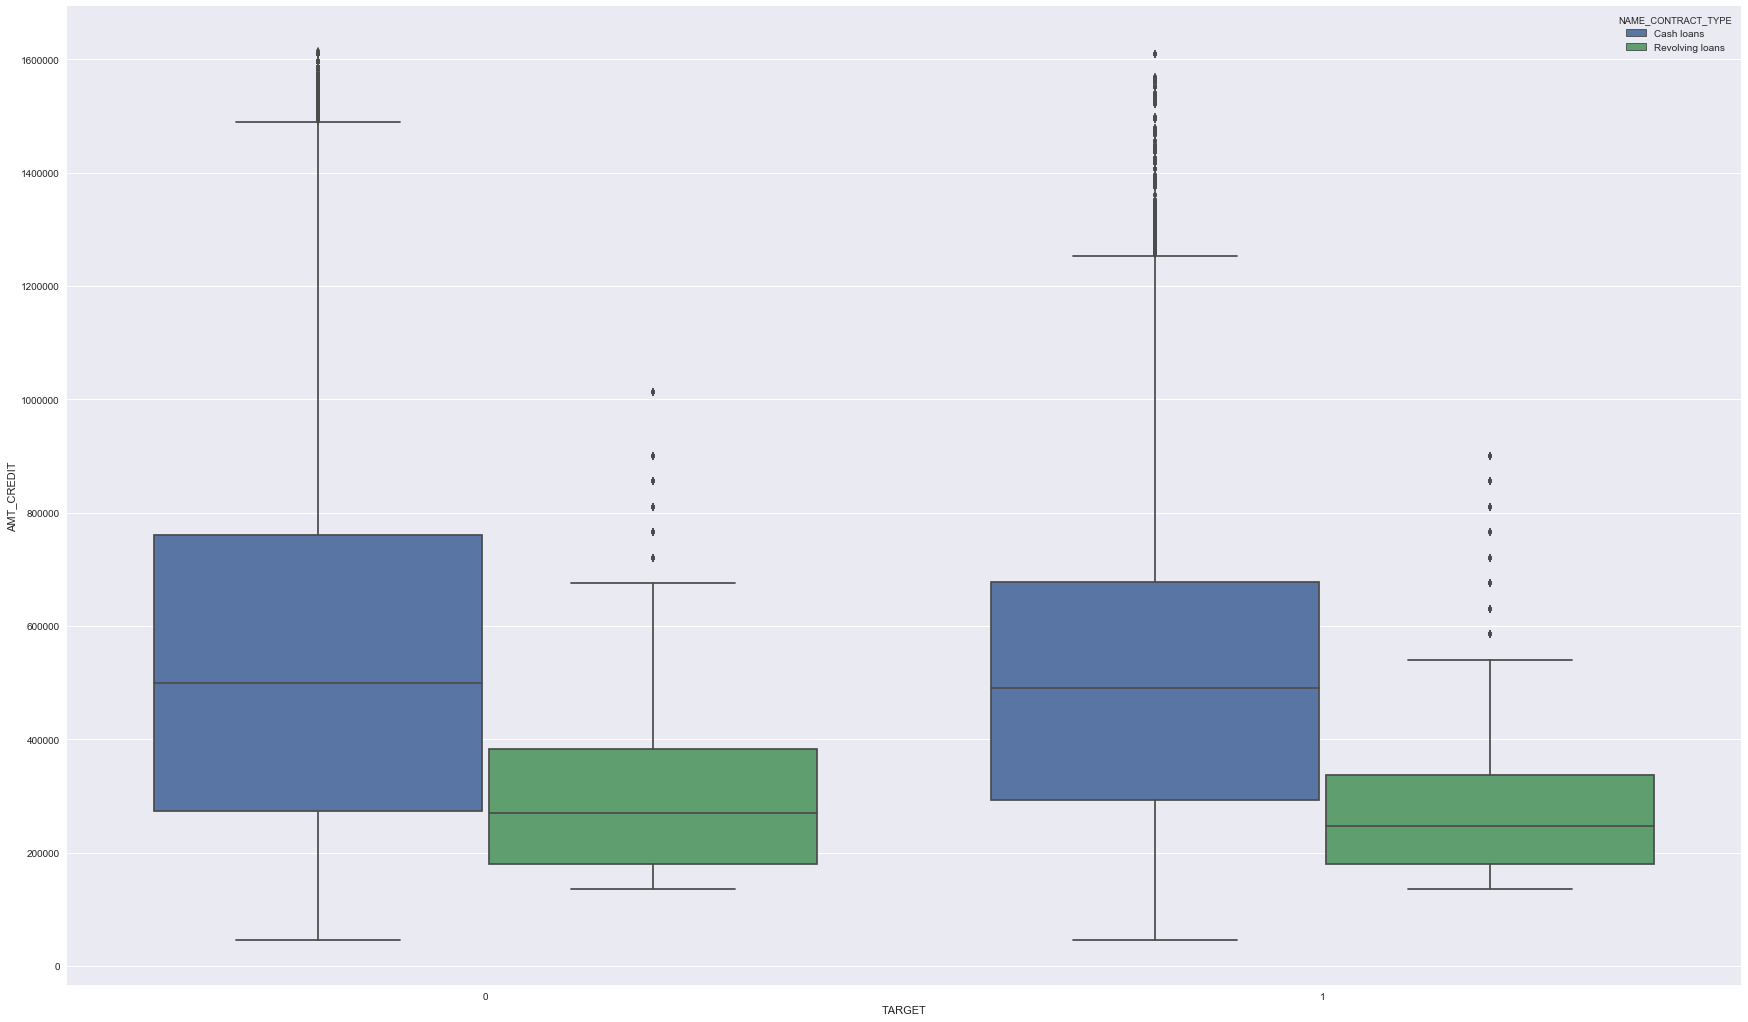

In [79]:
plt.figure(figsize=(30, 18))
sns.boxplot(data =dfinal,x='TARGET',y='AMT_CREDIT',hue='NAME_CONTRACT_TYPE')

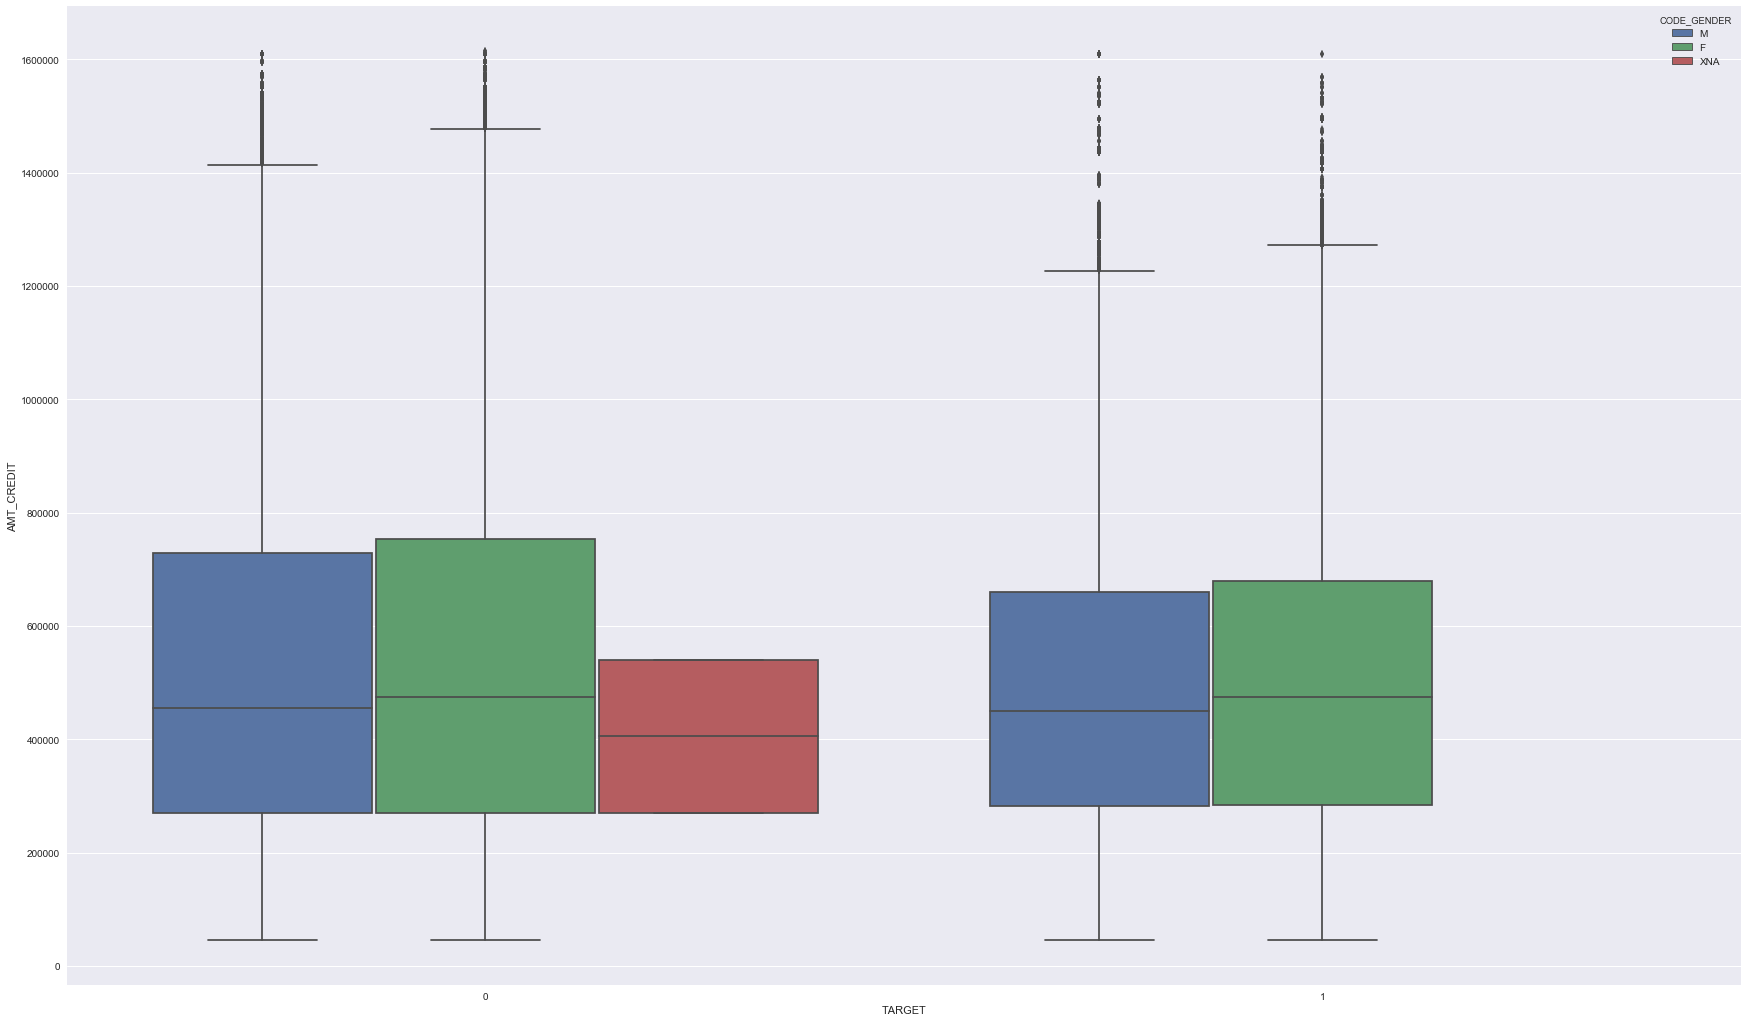

In [80]:
plt.figure(figsize=(30, 18))
sns.boxplot(data =dfinal,x='TARGET',y='AMT_CREDIT',hue='CODE_GENDER')

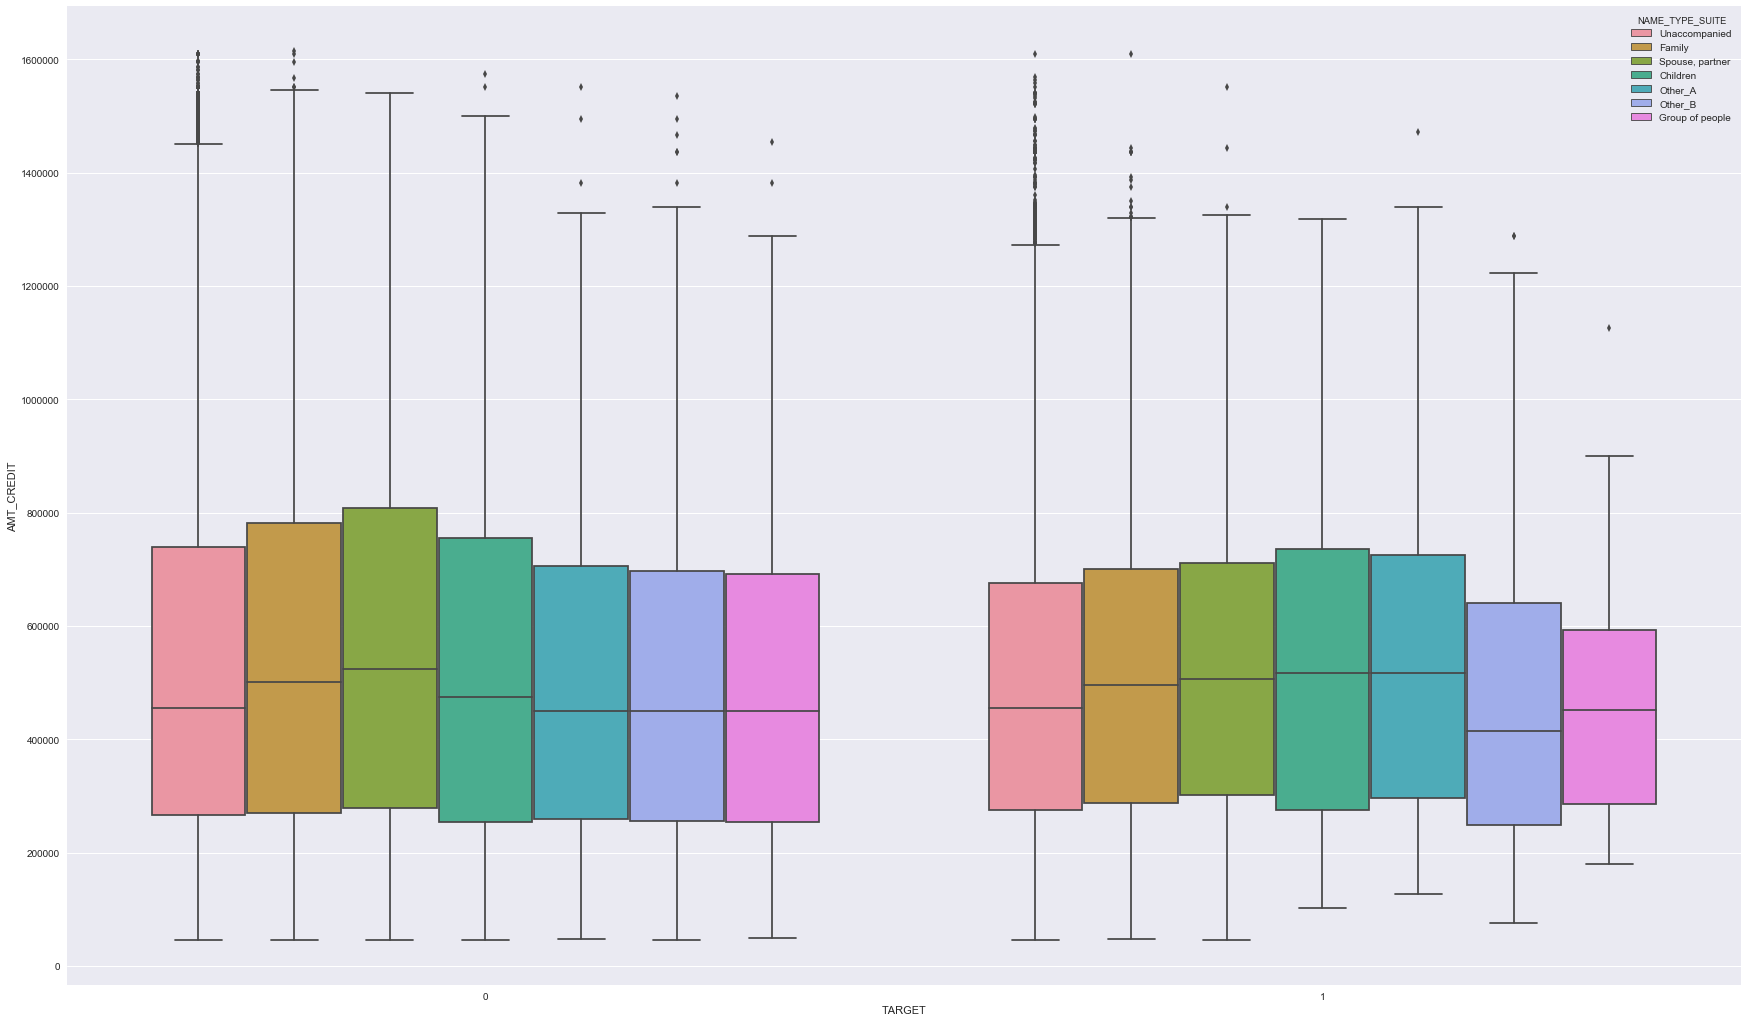

In [81]:
plt.figure(figsize=(30, 18))
sns.boxplot(data =dfappdata,x='TARGET',y='AMT_CREDIT',hue='NAME_TYPE_SUITE')

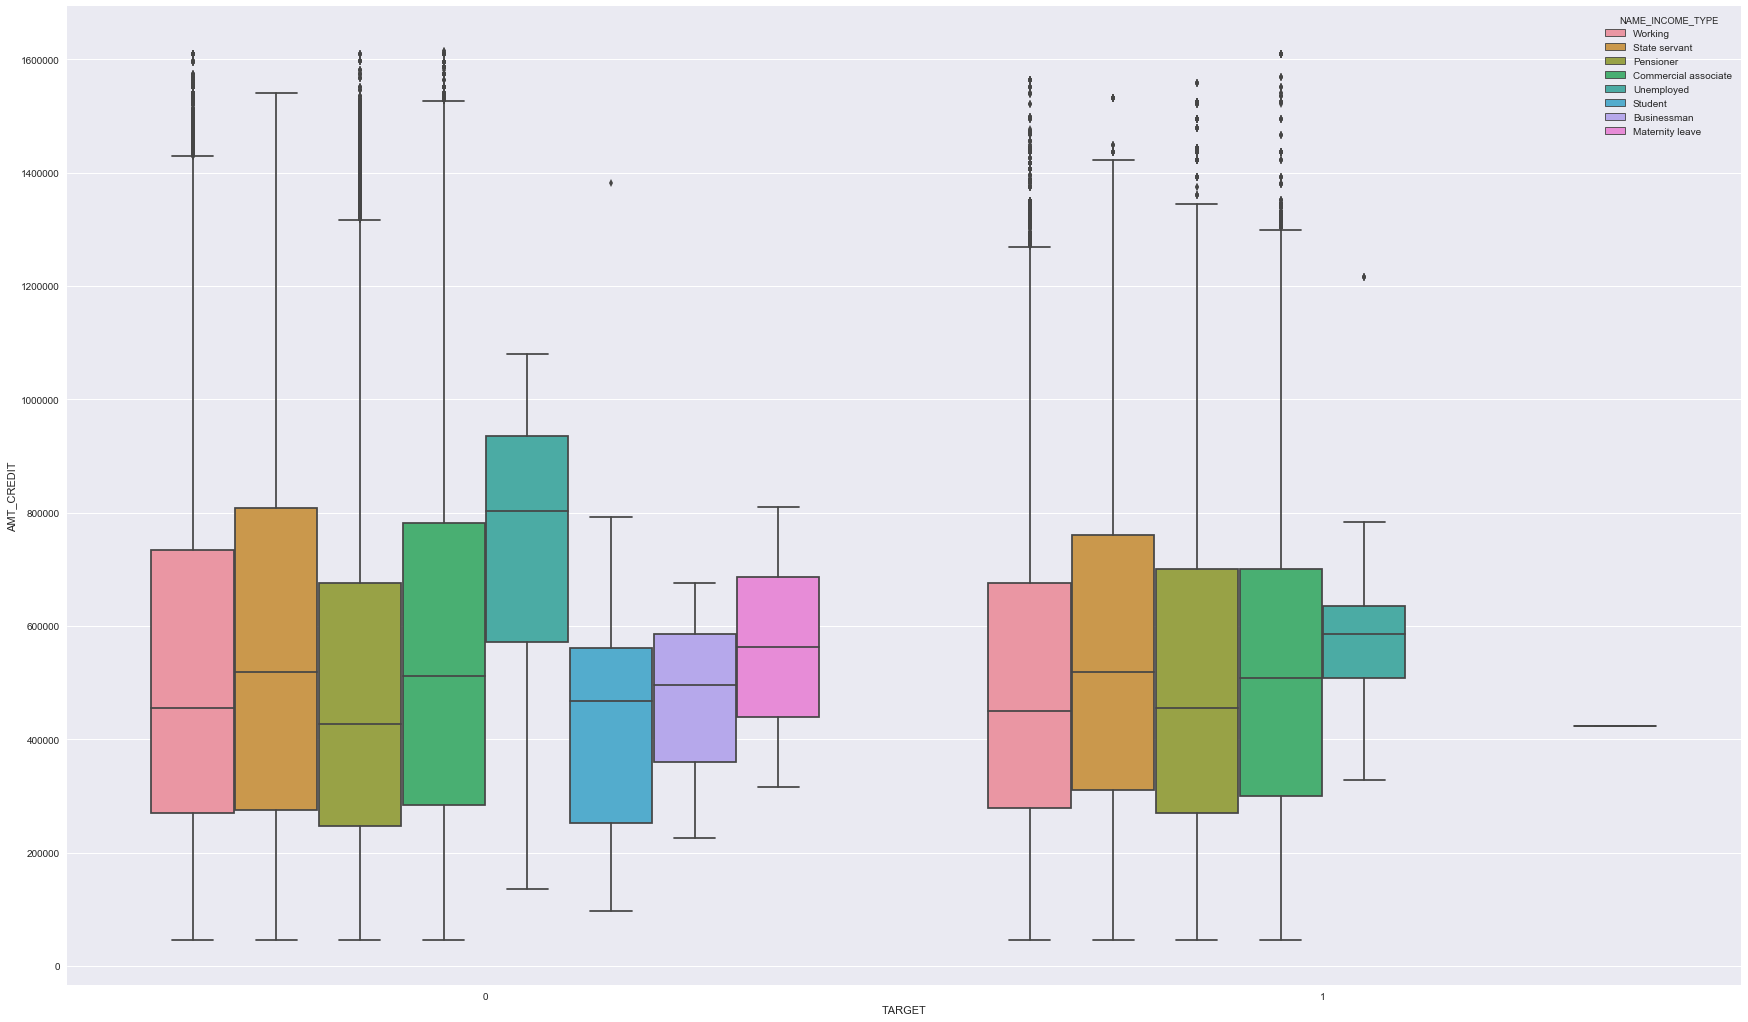

In [82]:
plt.figure(figsize=(30, 18))
sns.boxplot(data =dfinal,x='TARGET',y='AMT_CREDIT',hue='NAME_INCOME_TYPE')

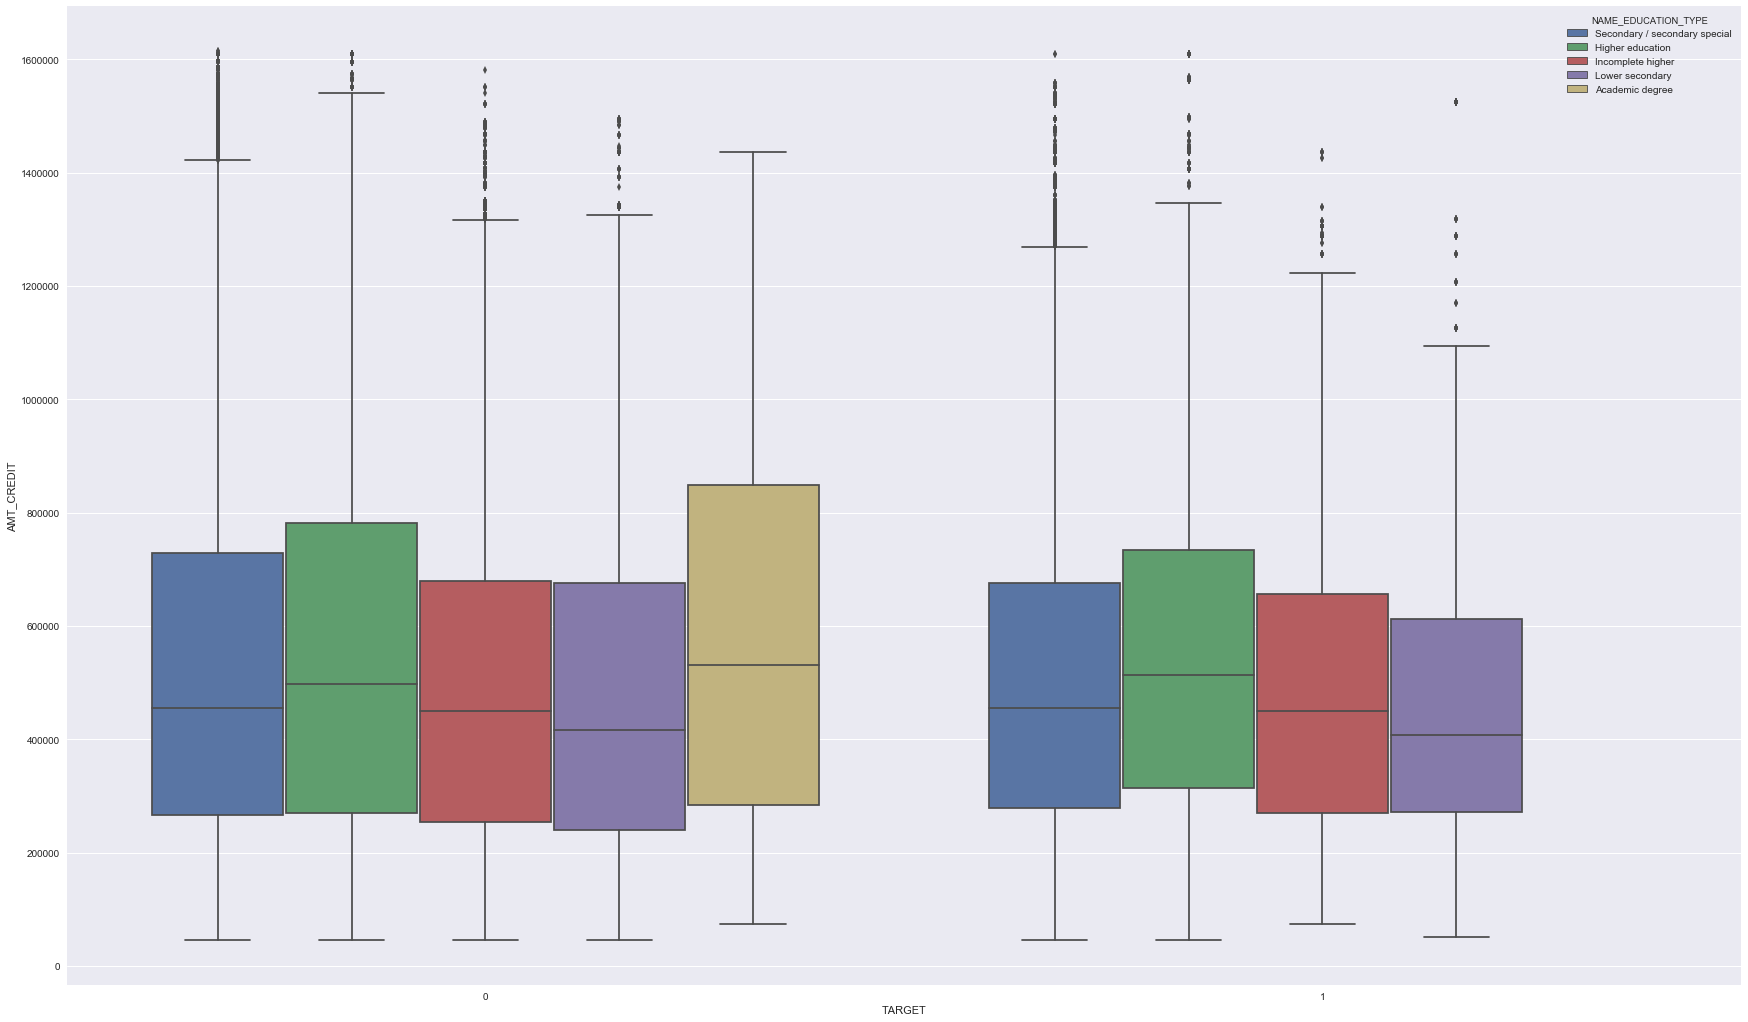

In [83]:
plt.figure(figsize=(30, 18))
sns.boxplot(data =dfinal,x='TARGET',y='AMT_CREDIT',hue='NAME_EDUCATION_TYPE')

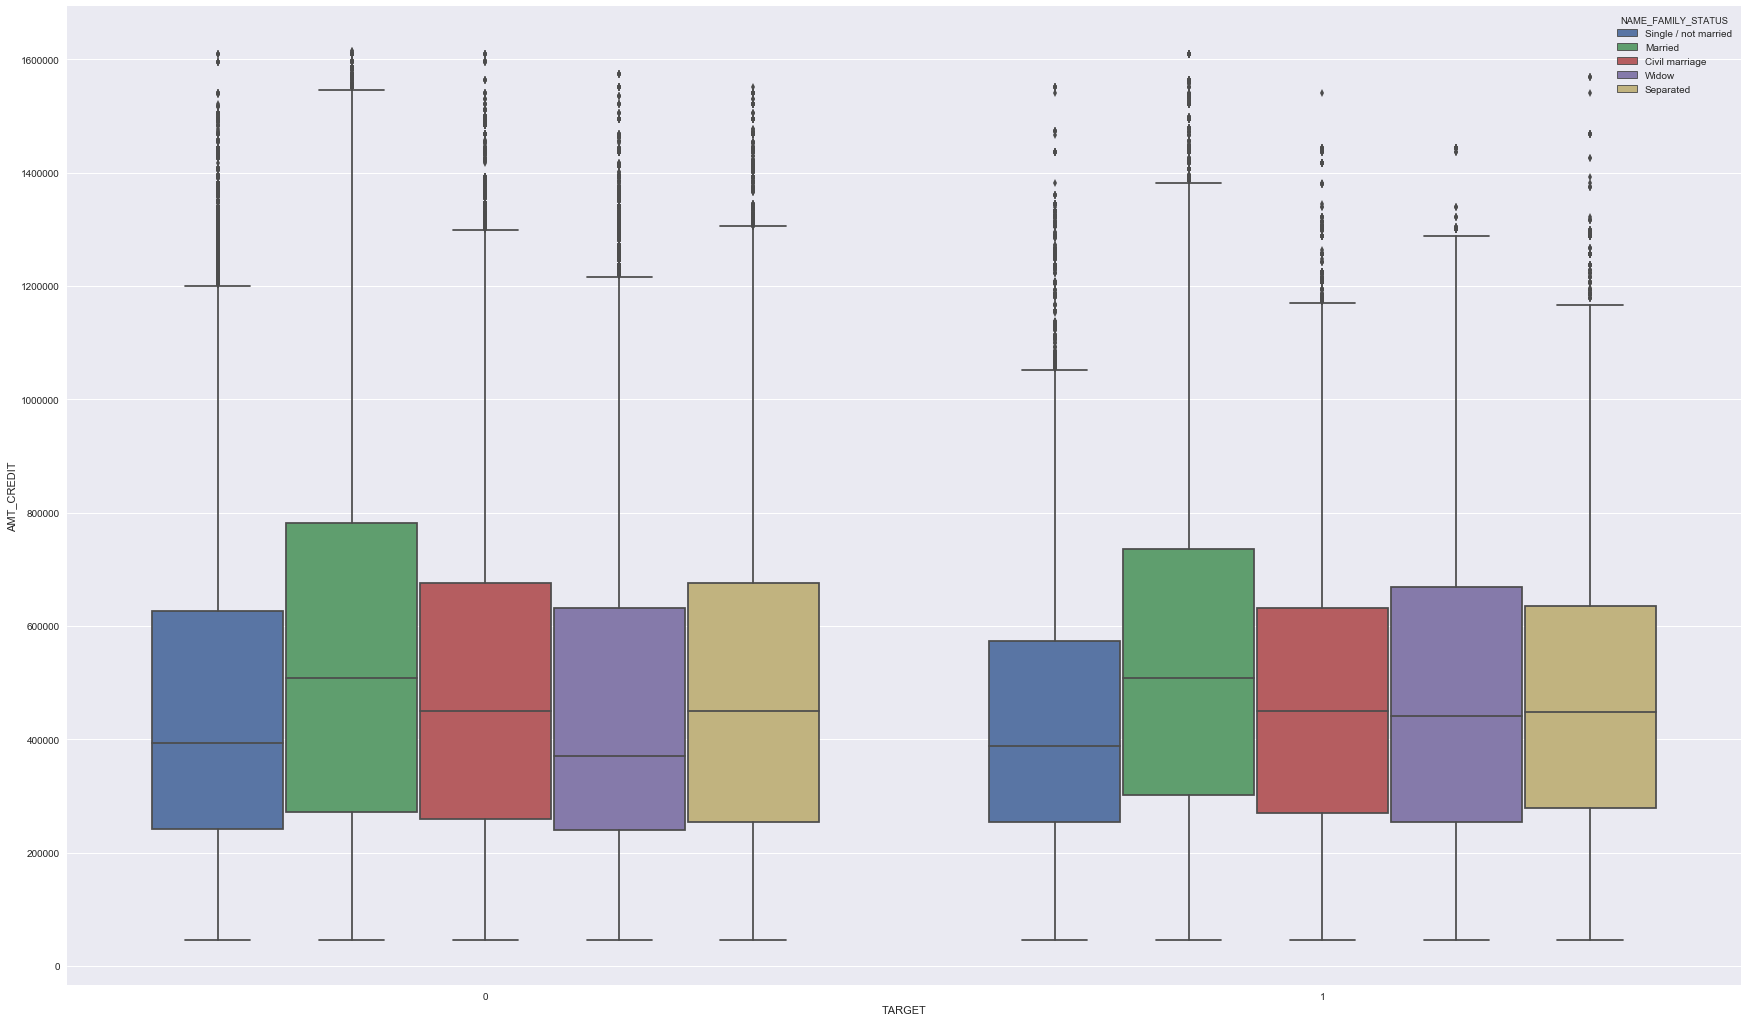

In [84]:
plt.figure(figsize=(30, 18))
sns.boxplot(data =dfinal,x='TARGET',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS')

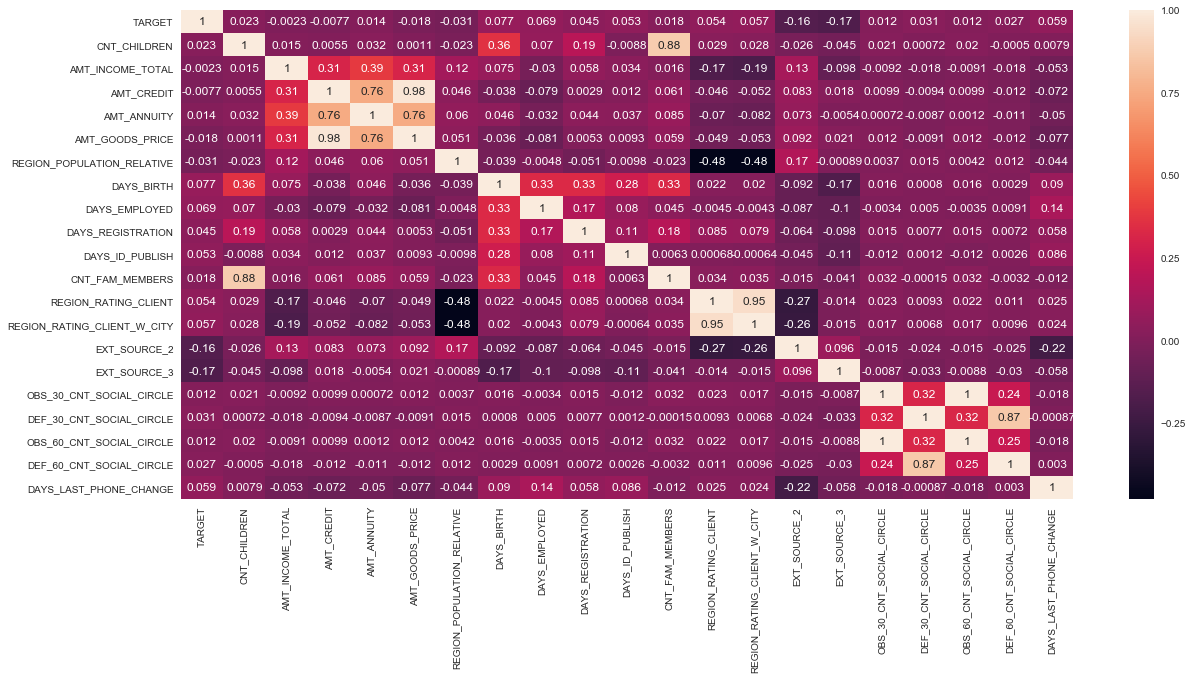

In [85]:
# Let's see the correlation among all variables with Target
final_cor=dfinal.drop('SK_ID_CURR',axis=1).corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(final_cor,xticklabels=final_cor.columns.values,yticklabels=final_cor.columns.values,annot= True)
plt.show()

From the above graph it is clearly showing that 
1. 'CNT_CHILDREN', 'AMT_ANNUITY','DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'  columns has positive correlation with TARGET variable and 
2. 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','EXT_SOURCE_2', 'EXT_SOURCE_3' has negative correlation
       

# Bivariate analysis with Target variable

In [86]:
# Converting 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' columns in to Years
dfinal[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]=dfinal[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]/-365

In [87]:
'''
def seaborn_plotter(independent_vs, dependent_v, df):
    for i in independent_vs:
        plt.figure(figsize=(21,7))
        #ax1 = plt.subplot(1,1,1) # rows, cols and index
        ax2 = plt.subplot(1,1,1)
        #ax3 = plt.subplot(1,2,3)
        #sns.boxplot(x=i, y=dependent_v, data=df, ax=ax1)
        sns.countplot(df[i], ax=ax2)
        #sns.scatterplot(x=i, y=dependent_v, data=df, ax=ax3)
'''        

In [88]:
#x_cols=final_cor.columns
#seaborn_plotter(x_cols,'TARGET',dfinal)

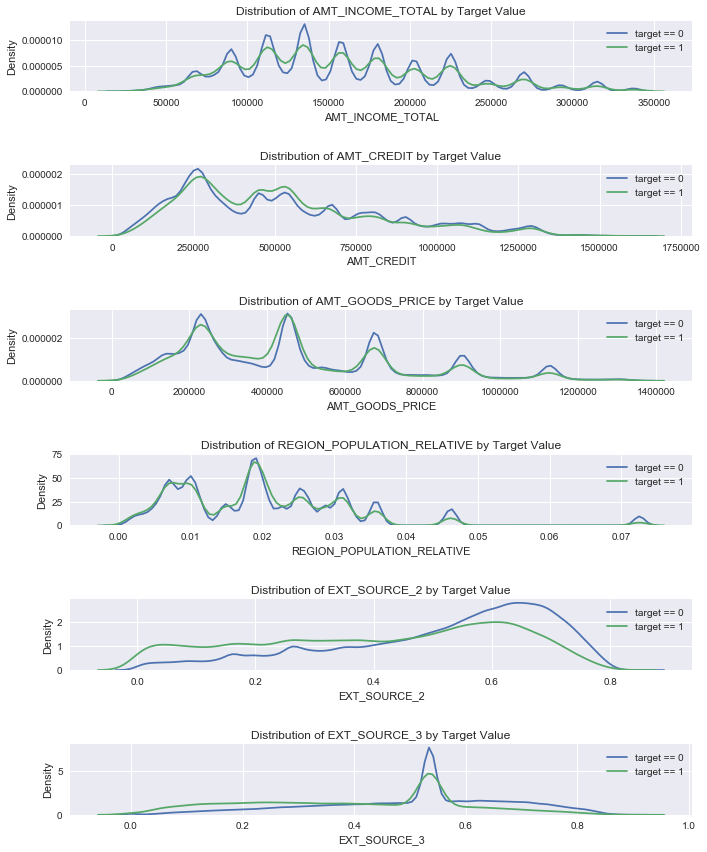

In [89]:
# Let's plot the graph of the variables having negative correlation with Target variable
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','EXT_SOURCE_2','EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(6, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(dfinal.loc[dfinal['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(dfinal.loc[dfinal['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

From the above graphs it is clearly showing that the customers having Good_income, good amount_credit, income from other external sources, etc... are more likely to repay the loan without any difficulties.

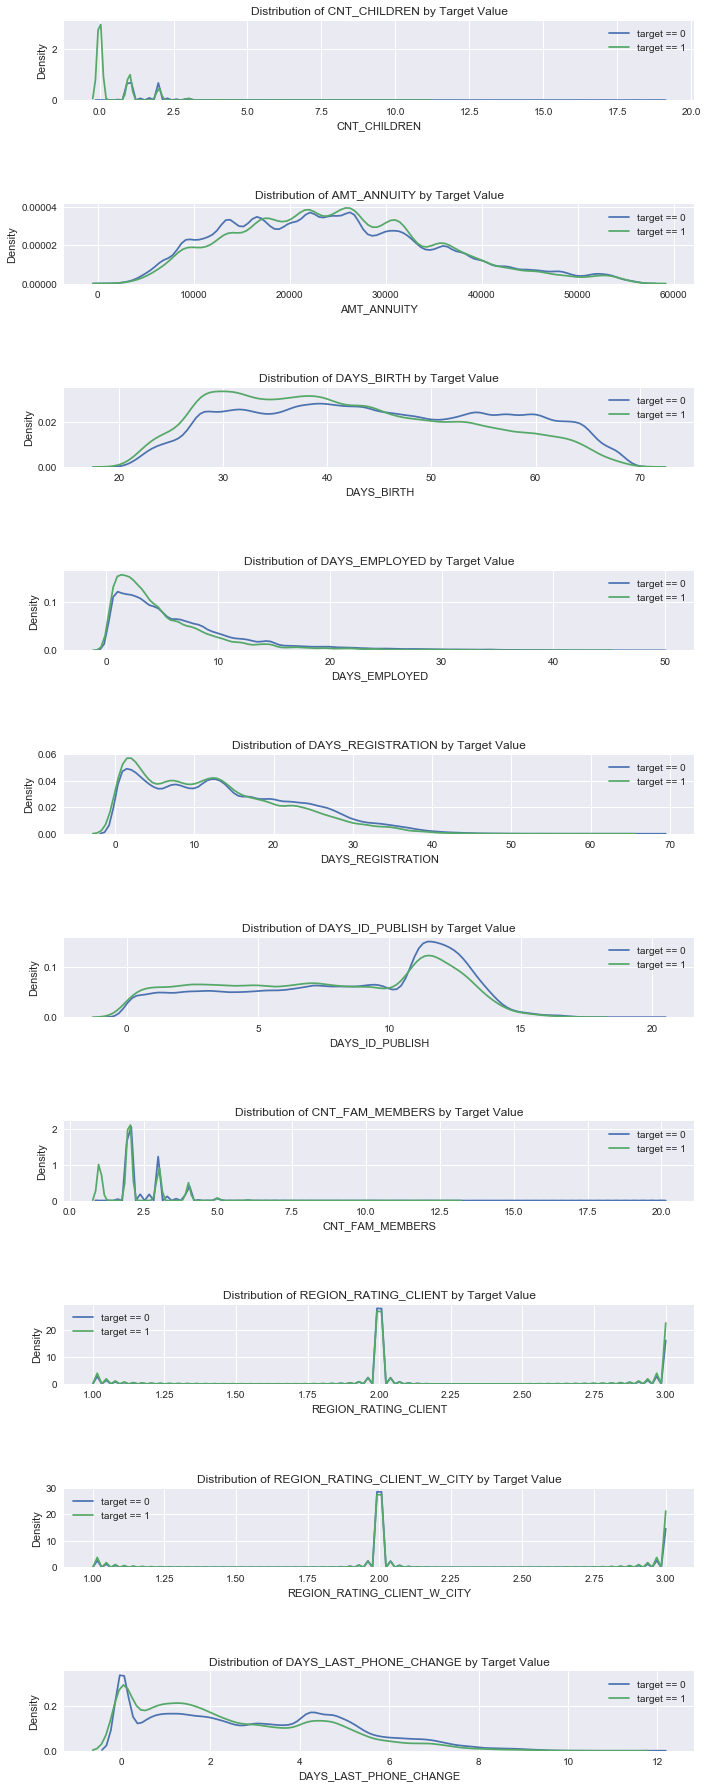

In [90]:
# Let's plot the graph of the variables having positive correlation with Target variable
plt.figure(figsize = (10, 25))

# iterate through the sources
for i, source in enumerate(['CNT_CHILDREN', 'AMT_ANNUITY','DAYS_BIRTH', 'DAYS_EMPLOYED', 
                            'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 
                            'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE' ]):
    
    # create a new subplot for each source
    plt.subplot(10, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(dfinal.loc[dfinal['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(dfinal.loc[dfinal['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 5)

From the above graphs,
1. When customer having less than 2 kids
2. AMT_ANNUITY from 18000 to 35000
3. Age from 20years to 40 years
4. Days_Employed less 5 years
5. Days_Registration less than 10 years
6. days_id_publish less than 7.5 years
7. Mainly un-married and married people with kids
8. Last_phone_change less than 3 years 

The above all factors from client's history has difficulty in repay their loans.

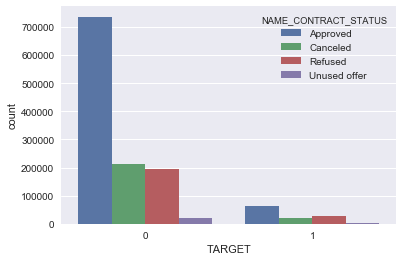

In [108]:
# Let's compare our analysis with the previous credit history
sns.countplot(x = "TARGET", hue ='NAME_CONTRACT_STATUS', data=dfinal)

So, loans repayment issues with the clients follows the order of *Approved>Refused>Cancelled>Ununsed offer* loans